# 2022-05-13 • A Network

## Imports

In [1]:
#

In [2]:
using Revise

In [3]:
using MyToolbox

In [4]:
using VoltoMapSim

## Params

In [76]:
p = get_params(duration=20*seconds, syn_strengths=LogNormal_with_mean(20 * nS, 1));
# dumps(p)

## Run sim

In [77]:
state = (init, var, rec) = sim(p.sim);

Running simulation: 100%|███████████████████████████████| Time: 0:00:10


In [78]:
import PyPlot

In [79]:
using VoltoMapSim.Plot

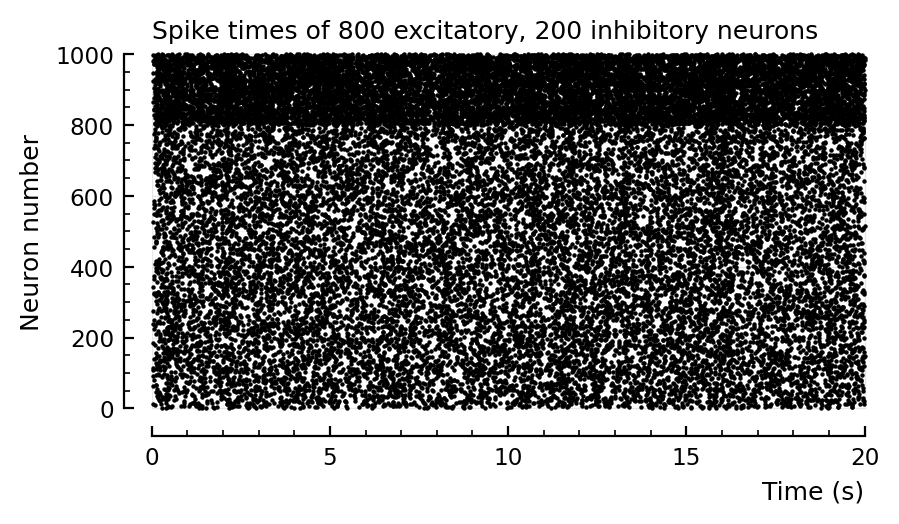

In [83]:
spiketimes = []
neuron_nrs = []
for n in eachindex(rec.spike_times)
    spikes = rec.spike_times[n]
    push!(spiketimes, spikes)
    push!(neuron_nrs, fill(n, length(spikes)))
end
fig, ax = plt.subplots(figsize=(4.6, 2.3))
plot(ax, vcat(spiketimes...), vcat(neuron_nrs...), "k.", ms=1.2, clip_on=false,
     ylim=(0, p.sim.network.N),
     xlim=(0, p.sim.general.duration));
N_exc = length(init.neuron_IDs.exc)
N_inh = length(init.neuron_IDs.inh)
set(ax, xlabel="Time (s)", ylabel="Neuron number",
    hylabel="Spike times of $N_exc excitatory, $N_inh inhibitory neurons");

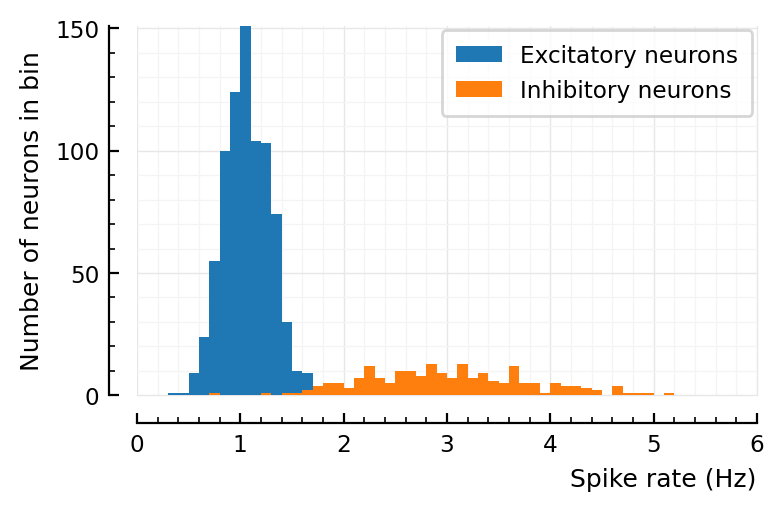

In [81]:
num_spikes = length.(rec.spike_times)
spike_rates = num_spikes ./ p.sim.general.duration
fig, ax = plt.subplots()
M = ceil(Int, maximum(spike_rates))
bins = 0:0.1:M
xlim = (0, M)
ax.hist(spike_rates.exc; bins, label="Excitatory neurons")
ax.hist(spike_rates.inh; bins, label="Inhibitory neurons")
# ax.text(2.2, 80, "Excitatory", c=as_mpl_type(color_exc))
# ax.text(5.2, 30, "Inhibitory", c=as_mpl_type(color_inh))
ax.legend()
ax.set_xlim(0, 1)
set(ax, xlabel="Spike rate (Hz)", ylabel="Number of neurons in bin"; xlim);

## A previous sim

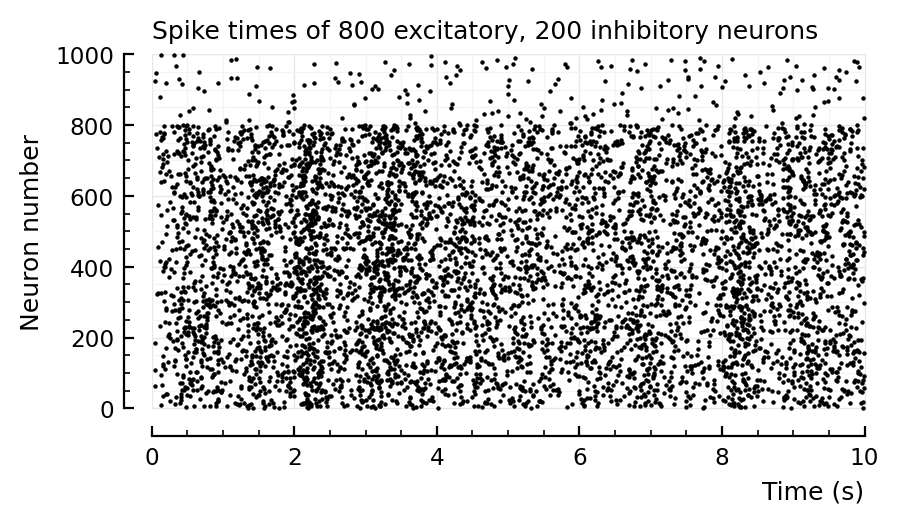

In [34]:
spiketimes = []
neuron_nrs = []
for n in eachindex(rec.spike_times)
    spikes = rec.spike_times[n]
    push!(spiketimes, spikes)
    push!(neuron_nrs, fill(n, length(spikes)))
end
fig, ax = plt.subplots(figsize=(4.6, 2.3))
plot(ax, vcat(spiketimes...), vcat(neuron_nrs...), "k.", ms=1.2, clip_on=false, ylim=(0, p.sim.network.N), xlim=(0, p.sim.general.duration));
N_exc = length(init.neuron_IDs.exc)
N_inh = length(init.neuron_IDs.inh)
set(ax, xlabel="Time (s)", ylabel="Neuron number",
    hylabel="Spike times of $N_exc excitatory, $N_inh inhibitory neurons");

In [114]:
median(init.syn_strengths.exc) / nS, median(init.syn_strengths.inh) / nS

(0.18459934375206885, 0.7312858232731787)

In [35]:
num_spikes = length.(rec.spike_times)

ComponentVector{Int64}(exc = [4, 9, 5, 5, 5, 9, 9, 19, 6, 7  …  3, 10, 6, 5, 5, 12, 4, 19, 11, 7], inh = [0, 1, 0, 0, 1, 2, 2, 3, 1, 0  …  0, 0, 0, 1, 0, 0, 2, 0, 1, 0])

In [40]:
spike_rates = num_spikes ./ p.sim.general.duration
[minimum(spike_rates), median(spike_rates), maximum(spike_rates)]' ./ Hz

1×3 Matrix{Float64}:
 0.0  0.6  2.5

In [ ]:
median(spike_)

In [45]:
VI_sigs = add_VI_noise(state, p.sim, p.imaging);

## Plot

In [43]:
t = init.timesteps;

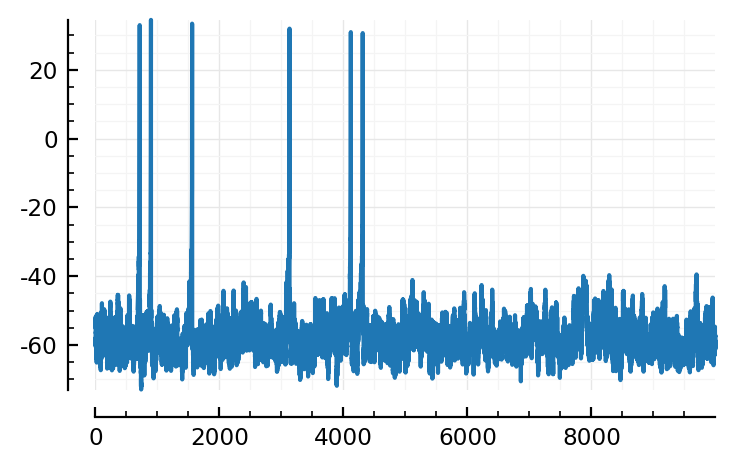

In [44]:
plotsig(t / ms, rec.voltage_traces[1] / mV);

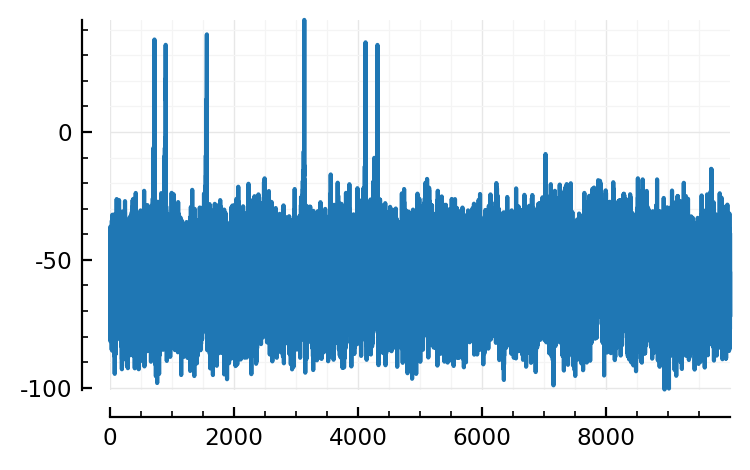

In [46]:
plotsig(t / ms, VI_sigs[1] / mV);

## Longer sim, with conntest

In [9]:
p = get_params(duration=3 * minutes);
# dumps(p)

## Run sim

In [10]:
@time state = (init, var, rec) = sim(p.sim);

LoadError: InterruptException: